source: Graph Databases, 2nd edition

# Chapter 1: Introduction


## What is a graph?

* A graph is just a set of edges and vertices (or nodes & relationships). 
* Gartner identified 5 graphs in the world of business: social, intent, interest, consumption and mobile and leveraging these graphs provides a sustainable and competetive advantage. 


### Example: Twitter dataset

* In the below screenshot You can see pretty clearly that the nodes represent users and the edges represent who follows who 


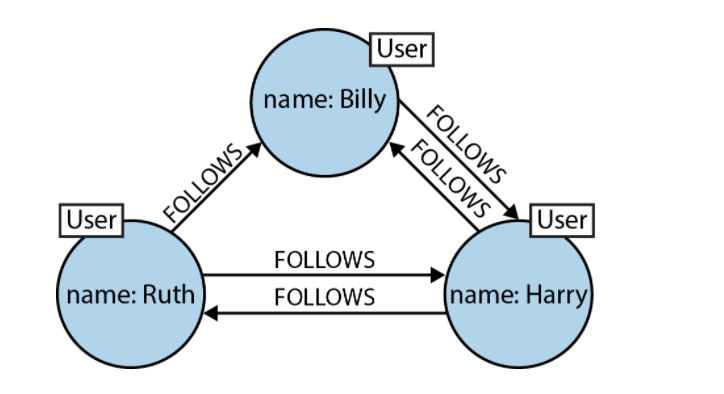

* In the below screenshot you can see a more complex structure

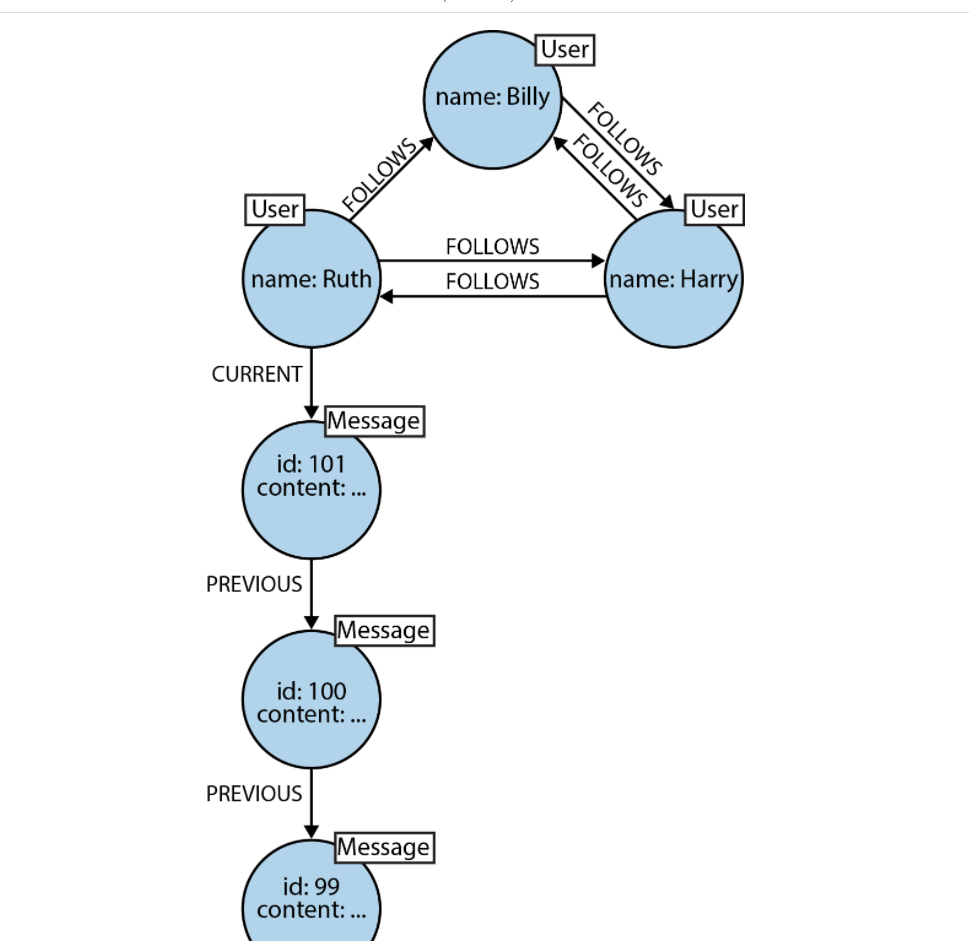



* these two images represent one of the most popular forms of the graph model: the labeled property graph. 

### labeled property graph properties

1). It containts nodes and edges
2). Nodes contain properties (key,value) pairs
3). Nodes can be named and directed, and always have a start and end node
4). Relationships can also contain properties

* This is an extremely popular graph model 


## High Level View of the Graph Space

* Numerous projects and products for managing, processing and analyzing graphs have exploded onto the scene in recent years
* Space can be divided up into two segments
1). Technologies used primarly for transactional online graph persistance - accessed in real time from an application
- These technologies are called graph databases and are the main focus of this book. They are the graph equivalant to OLTP databases
2). Technologies used primarily for online graph analytis, typically performed as a series of batch steps.
- Also known as graph compute engines. Can be thought of as basically data mining/OLAP


* Another way to slice the graph space is to look at the graph model employed by various technologies - three models dominate

- Property Graph (most popular)
- Resource Description Framework (RDF) triples
- Hypergraphs



## Graph Databases


* GDMS (or graph database) is an online database management system with CRUD methods that expose a graph datamodel
* Graph databases are generally built for use with transactional OLTP systems. Engineered with transactional integrity and operational availability in mind

### two serious properties: Storage, Processing Engine

####  1. Storage
* Some graph databases use native storage -> others will serialize the graph data into another data structure (like a relational database, oop database, general purpose datastore).

#### 2. Processing engine
* Some definitons require that a graph database use an index-free adjaceny: meaning connecting nodes physically point to other nodes in the database.
* Basically the best definition is any database that uses a graph datamodel with CRUD methods exposing it 
* Worth noting that there are significant performance advantages of index-free adjacency


#### Graph first or native graph technology
source: https://neo4j.com/blog/native-vs-non-native-graph-technology/
* has the particualr Graph Database been designed to be a graph first technology? or was it bolted on as an afterthought?


* Relationships are first class citizens in Graph databases
* this is in contrast to RDBMS systems where you have to infer relationships with things like FK or with processing paradigms like map-reduce
* Graphs allow us to model our datamodels closer to the real life problem 
* allow for easier and more expressive models than a comparative data model in an RDBMS or NOSQL datamodel

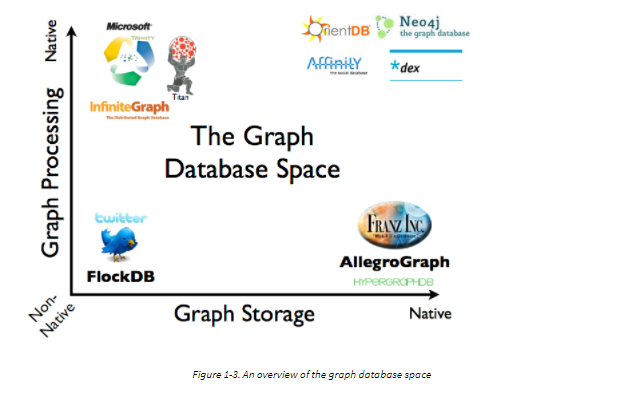


### Graph Compute Engines

* a technology that enables global graph computational algos to be run against large datasets. Graph Compute engines are designed to do things like idenfity clusters in your data or answer questions
* designed for batch analysis and processing large amount of data 
* some graph compute engines contain a storage layer - most stick with data processing
* In diagram below it shows how you can ETL from a source to the graph compute engine
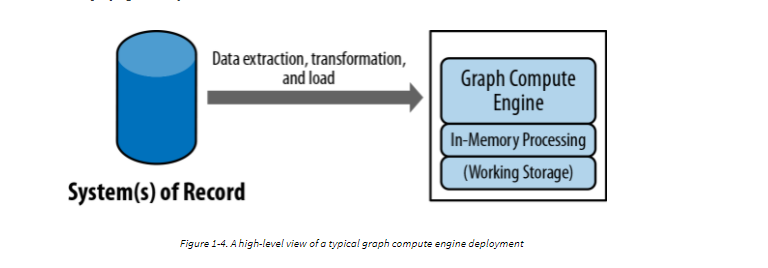
* Most graph compute engines are in-memory/single machines
* there are some distributed graph compute engines based on Google Pregel white paper



## Power of Graph Databases 

* Graph databases provide a powerful but novel data modeling technique but that alone is not enough to replace a well-established, well-understood data platform; 
* Motivation for changing can be found in use cases and data patterns who's performance improvements can be found in orders of magnitude. 
* Besides performance graph databases have an incredibly flexible datamodel
* delivery mechanism aligned with agile methodology
 
 
### Performance

* Most compelling reason to implement a GDMS 
* In contrast with RDBMS where join intensive queries have a significant performance decrease as dataset get's bigger , with graph databases performance remains constant as the dataset grows.
* Queries are localized to a portion of the graph. As a result, the execution time for each query is proportional with that size of the hraph traveresed, vs the size of the graph as a whole

### Flexibility 

* As data architects we want to connect data as the domain dictates, allowing structures and schemas to emerge in tandem with our growing understanding of the problem space, rather than being imposed upfront when we know least about the real shape and intracacies of the data.
* IT can move at speed to address changes in the data model
* Graphs are naturally additive, meaning we can add new kinds of relationships, nodes, labels, and new subgraphs to an existing data structure without disturbing existing queries and application functionality.
* No aggressive datamodeling beforehand

### Agility

* Schema-free nature coupled with graphs API and query language empower rapid and continuous development. 
* Graph databases lack the kind of schema-oriented data govenernace mechanisms we're familiar with in the real world. 
* Governance is typically applied in a programmatic fashion, using tests to drive out the data models and queries as well as asert business rules that depend on the graph.

# Chapter 2. Options for Storing Connected Data

## Relational Databases Lack Relationships

* For several decades, developers have tried to accomodate connected, semi structured datasets inside relational databases.
* Relational databases were designed to codify forms and tabular structures, they struggle to model ad-hoc / exceptional relationships
* Relationships do exist in relational DB vernacular - but only at modeling time as a means of joining tables. 
* hard to evovle an existing database to meet new business needs
* see below: Semantic relationships are hidden or abstracted in typical relational datamodels


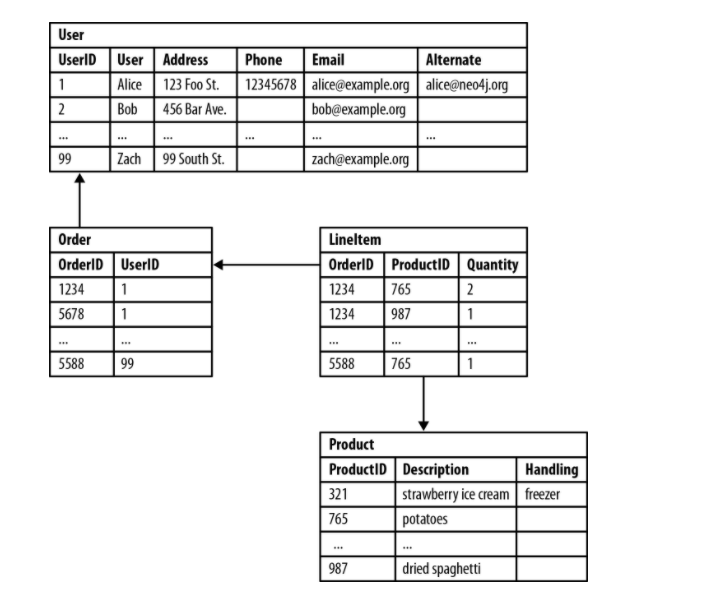



##### Application exerts tremendous influence over design of this schema

1). Join tables add accidental complexities
2). Foreign key constraints add additional development and maintaince overhead, just to make the database work
3). Sparces tables with nullable collumns require special checking
4). Several expensive joins are needed just to discover what a customer bought for example. 
5). Relational databases are horrible with recursive or reciprical questions like "which customer bought this product" or "which customer that bought this product also bought this product"

Basically relational databases struggle with highly connected data. 



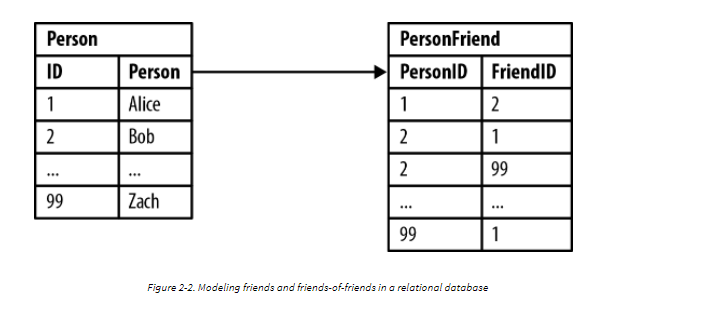

### Example of recripical queries being hard for relational databases

Question 1 : Who is bobs friends
Question 2: Who is friends with bob
Question 3: Who is friends of my friends
    
    
* Things to note: hierarchies in SQL use recursive joins, which make the query syntactically and computationally more complex
* queries that extend several degrees will see performance degredation on orders of magintude due to the complexities of recusive joining tables
* Something also worth mentioning is schemas seem to be brittle and rigid. In order to overcome this you create sparsely populated talbes with many nullable collumns and code to handle the exceptional case. This increase coupling and destroys any semblance of cohesion.



#### NOsql Databases Lack Relationships


* Most NoSQL databases - whether key-value, document or column-oriented - store a set of disconnected documents/values/columns. This makes it difficult to use them for connected data and graphs
* you can embed an aggregate's identifier inside the filed belonging to another identifier: effectively creating a FK but this can become computationally expensive(?)

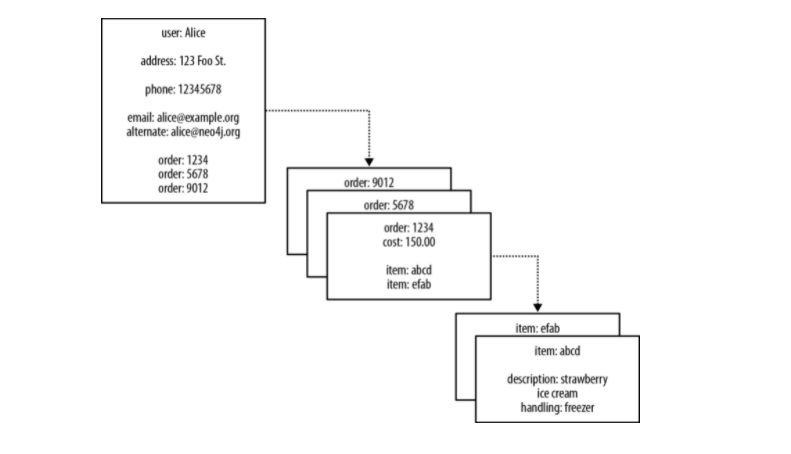

* Turning these inferences to a navigatable data strcture does NOT come free. Relationships aren't first class citizens of the data model. 
* The application must build the connections between all of these disparate data structures & make sure that all FK are deleted or updated upon that action
* tempting to think aggregate stores are functionally equivalant to a graph databases with respect to connected data. But this is not the case. Aggregate stores do not maintain consistency of connected data nor do they support index-free adjancency, whereby elemented contain direct links to their neighbors. 
* Something important to note is that because in a graph database the algorithm is only limited to the relevant section of nodes it will be far less computationally expensive than brute forcing the entire dataset
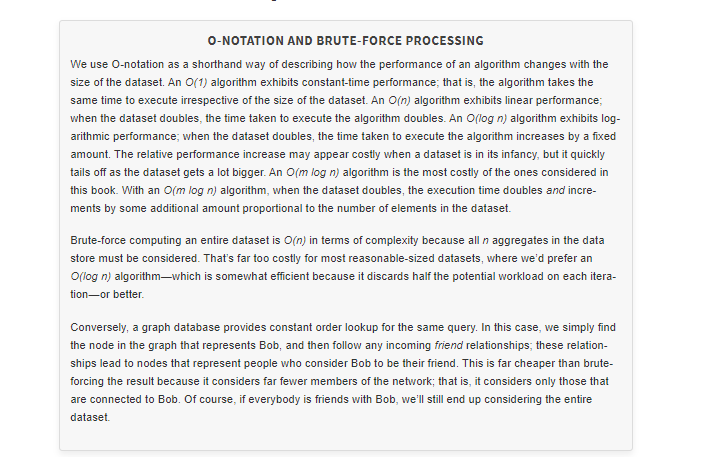
* basically highly interconnected and relationship oriented data is really computationally expensive the further hops away you move. 



#### Graph Databases Embrace Relationships

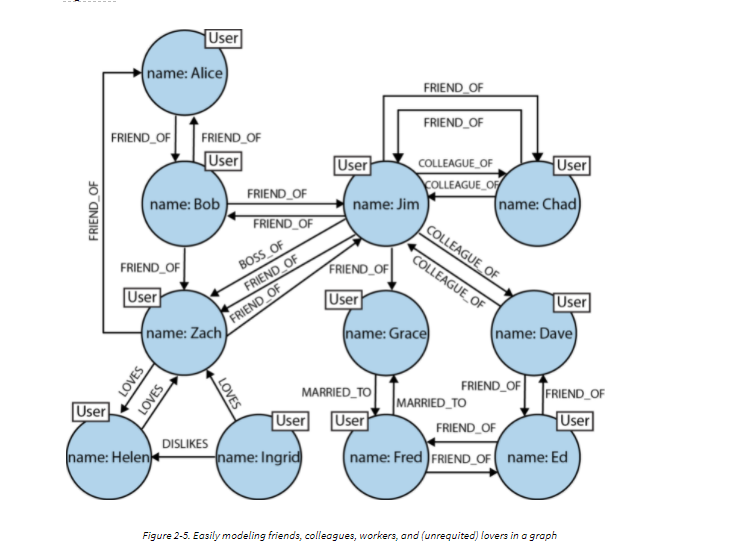

* The nodes in a graph could be of multiple different types. For example the above image the nodes are people. But they could also be products, places, etc. This is accounted for by labels. with Neo4j a Node can have multiple labels.
* Relationships in a graph naturally form paths. 
* below image shows a comparison of trying to find friends of friends at maximum depth of 5 using a RDBMS vs Graph Datbase
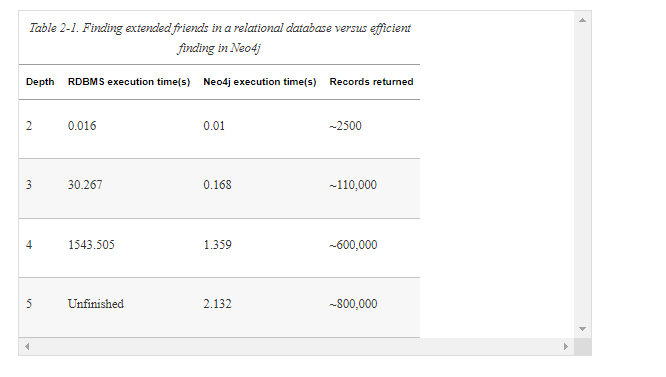
* Basically graphs excel at deep traversals and perform poorly when we move away from modestly sized set operations. 



# Biggest High Level Takeaway!!!!!


* From the data practitioners point of view, it's clear that the graph database is the best technology for dealing with complex variably structured and densly connected data - that is, with datasets so sophisticated they are unewildy when treated in any other form 


# Chapter 3: Data Modeling with Graphs

### Overview

* Cypher is the most popular query language!!


### Models & Goals

* Modeling is an abstract activity motivated by a particular need or goal. 
* We model in order to bring specific facets of an unruly domain into a space where they can be structured or manipulated
* There are no natural representations of the world the way it "really is". Just purposeful selections, abstractions and simplifications. 
* Graphs are much more representative data models to their problem domain - Great for whiteboarding!


### Labeled Property Graph 


* A labeled property graph is made up of nodes,relationships,properties and labels
* Nodes contain properties. Think of nodes as documents that store properties in the form of key,value pairs
* In Neo4j the keys are strings and the values are  the java string and primitive data types. Plus arrays of these types. 
* Relationships connect nodes and structure the graph. A relationship always has a direction, a single name, and a start and end node. There are no dangling relationships. 
* Nodes can be tagged with one or more labels. Labels group nodes together and indicate the roles they play within a dataset.
* Like Nodes, Relationships can also have properties. The ability to add properties to relationships is particularly useful for providing additional metadata for a graph algo. Adding additional semantics to relationships (including quality and weight) and for constraining queries to runtime. 



### Querying Graphs: An Introduction to Cypher 

* Cypher is an expressive (yet compact) graph database query language. Although currently specific to Neo4j, it's close affinitiy with our habit of representing graphs as diagrams make it ideal for programmatically describing graphs. 
* Cypher is easiest to learn
* Neo4j supports the RDF query language SPARQL and the imparative path query language Gremelin. 


### Cypher Philsophy 

* Cypher is designed to be easily read and understood by developers, database professionals and business stakeholders. 
* Cypher allows a user to find a specific pattern in a graph Db


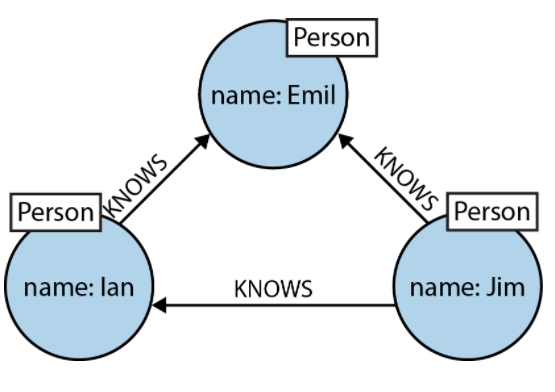


:::cypher
(emil)<-[:KNOWS]-(jim)-[:KNOWS]->(ian)-[:KNOWS]->(emil)


* This pattern describes a path that connects a node (jim) to two other nodes (ian, emil) and also connects the ian & emil node. 
* ian, emil and jim are identifiers. 
* Identifiers allow us to refer to the same node more than once when describing a pattern - a trick that allows us to get around that a query language is one dimensional.
* You probably will need to repeat identifiers. 




* The previous cypher pattern describes the graph structure (like a CREATE TABLE statement).
* It does not yet refer to any particular data in the database. To bind the pattern to specific nodes and relationships in an existing dataset we must specify some property values and node labels. 


(emil:Person {name:'Emil'})
<-[:KNOWS]-(jim:Person {name:'Jim'}
-[:KNOWS]-(ian:Person {name:'Ian'}
-[:KNOWS]-(emil)


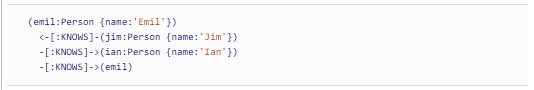


# MATCH Clause

* heart of most Cypher queries
* example of specification by example
* using ASCII charachters to represent nodes and relations we draw the data we're interested in. 
* You can anchor a predicate in the where clause as well 
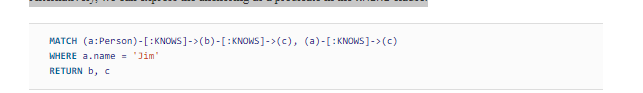

# RETURN
* Specifies which nodes, relationships and properties in the matched data should be returned to the client.
* Each matching node is lazily bound to it's identifier as the client iterates the results




# Other Cypher Clauses

### WHERE
* Provides criteria for filtering

### CREATE
* Creates nodes and relationships

### CREATE and CREATE UNIQUE
* Create nodes and relationships


### MERGE
* Ensures that the supplied pattern exists in the graph, either by reusing existing nodes and relationships or by creating new nodes and relationships (Upsert!)

### DELETE
* Removes nodes, relationships and properties

### SET
* Sets property values.

### Union
* Merges results from two queries

### WITH
* Chains subsequent query parts and forwards results from one to the next. Similar to piping commands in Unix


### START
* Specifices one or more explicit starting points - Nodes or relationships - in the graph (START is deprecated in favor of specifiying anchor points in a MATCH clause)






# A comparison of Relational and Graph Modeling

* to introduce graph modeling, we're going to look at how we model a domain using both relational and graph techniques.
* With relational databases we seek to understand and agree on the entities in the domain, how they interrelate, and the rules that govern their state transition. This is informally done through whiteboarding. 
* Next you come up with an ER Diagram. ER diagrams have severe limitations and allow only single undirected naed relationships between entities. This makes them a poor fit for real world domains where relationships are numerous and semantically rich.
* After having arrived at a suitable logical model, we map it into tables and relations, which are normalized to eliminate data redundancy 
* FK create a great deal additional complexity. 
* Great that we have a normalized model but it is now generally way too slow - so we must denormalize the model to make it more read performant. 
* This is a very fragile system. As the data model evolves through business requirements so do the underlying data structures. Nearly impossible to change the intial normalized data model. 
* Denormalized model is resistant to rapid evoultions the business demands of it's systems. 


### Example

### Actual domain
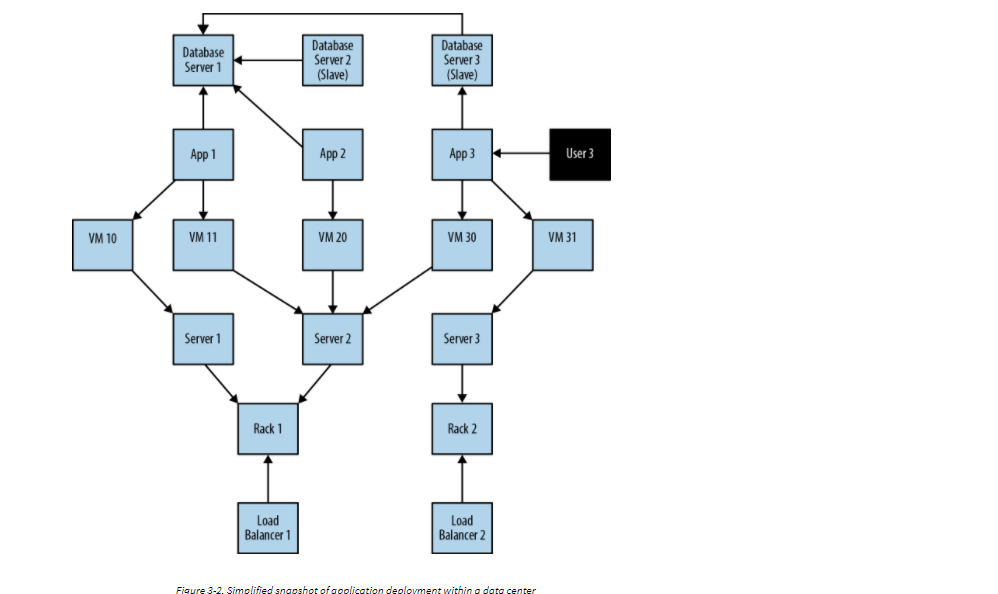


### Normalized domain
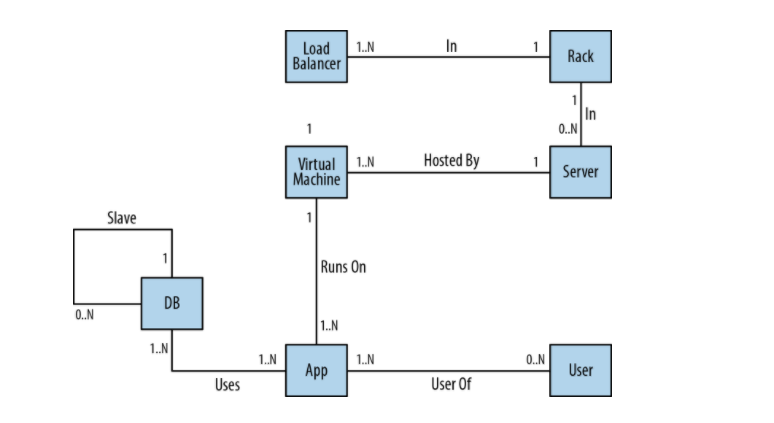

### Denormalized domain
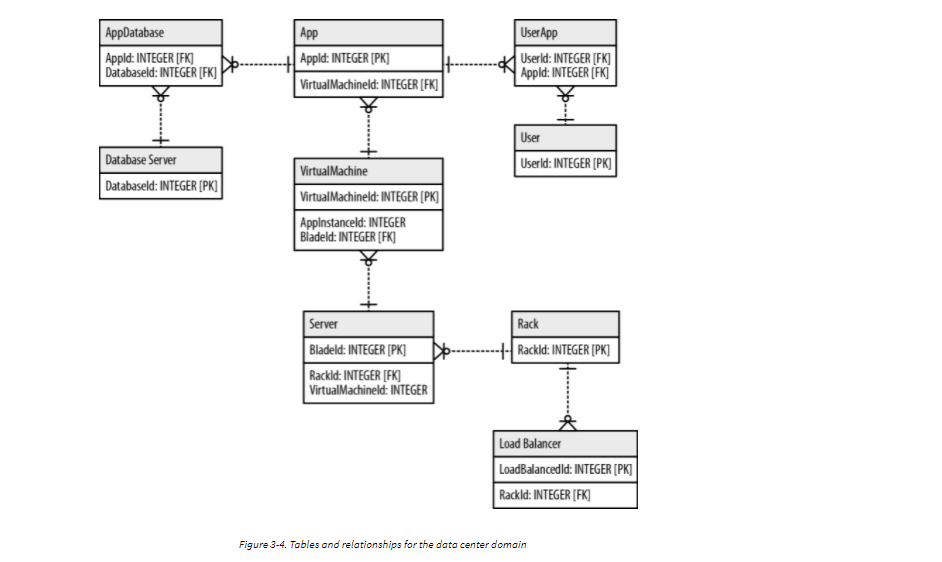


### Graph Modeling a Systems Management Domain

* we've seen how relational modeling and its attendent implementation activities take us down a path that divorces an applications underlying storage model from the conceptual worldview of it's stakeholders. Relational databases with their rigid schemas and complex modeling charachteristics are not an especially good tool for supporting rapid changes to the underlying schema!
* Graph data models are great for retaining data integrity through rapid changes
* early stages of analysis, the work required of us is similar to the relational approach, use lo-fi such as whiteboard sketches we agree upon a domain. 
* Instead of normalizing the data model into tables - You enrich the data model with the aim to accurately represent the parts of the domain relevant to applicatons goals. 
* Roles are captured as labels. 
* Domain models should be completely isomorphic to Graph model (1:1 relationship)
* what you sketch on the whiteboard typically is what you store in the database


#### one more time: What you sketch on the whiteboard is typically what you store in the database!!!!!

* Notice the graph model is enriched through properties and labels. 

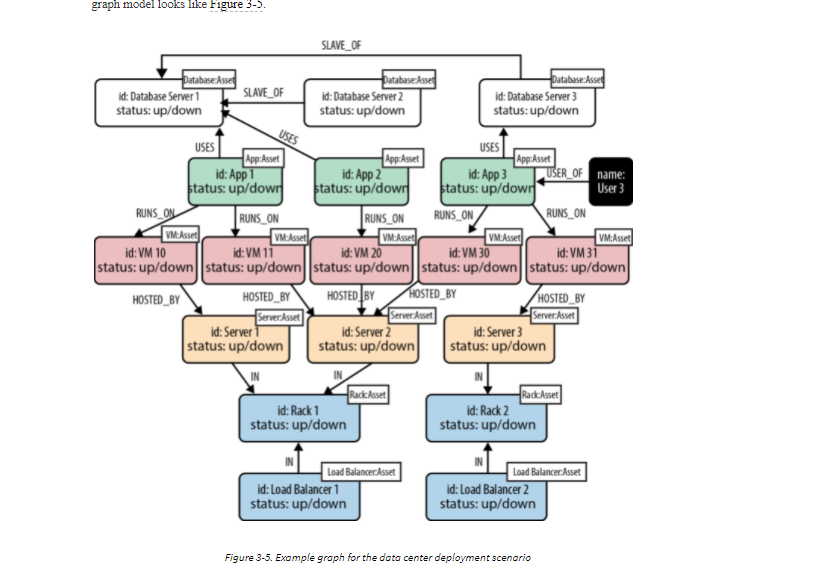



### Testing the Graph Model


* There are a number of design decisions that once they are baked into our application can hamper us further down the line.
* Subsequent changes to the graph structure will be driven solely by changes in the business 
* There are two techniques to test the graph model ... see below!


### Method 1: Check the Graph reads well

* first we pick a start node and then follow relationships to other nodes, reading each node's labels and each relationships name as we go. 
* Using the above example: "This app, which consists of App Instances 1,2 and 3 uses the database which resides on server 1,2,3"
* If reading the graph in this way makes sense, we can reasonable be confident it is faithful to the domain. 

### Method 2: Test query capabilities
* Design for queriability 
* In the above example, a user may want to identify the cause of unresponsiveness and resolve it. To determine what went wrong and resolve it. To determine what went wrong you will need to follow the path from the starting node. If we can craft a Cypher query to meet this requirement that would be further validation that the model fits. 




# Cross-Domain Model

* Busienss insights often depends on us understanding the hidden network effects at play in a complex value chain. 
* Basically how do you sync domains? Creating a graph of graphs. 
* Below you can see how three domains are synced via a value chain. Three domains are  literary, theotriacal , geospatial 
* Basically trace your finger through the graph to see how you would answer these questions.
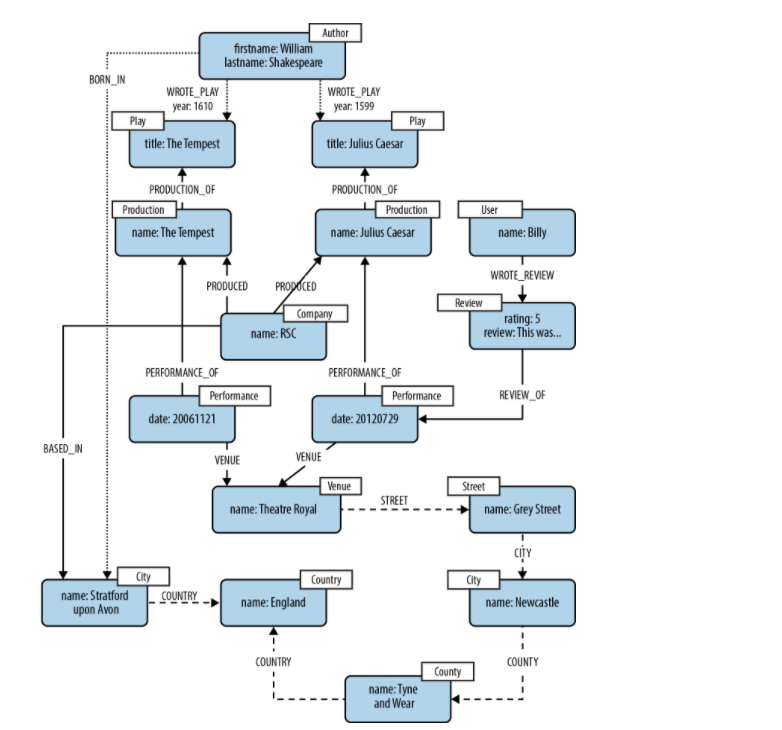


#### Relationships and labels create the semantic layer!!!! (SO Important!)
* In the above graph model relationship names and node labels are used to structure the graph and establish semantic context for each node
* Relationship name and direction help establish semantic context by connecting two nodes ina  meaningful way. By following an outgoing WROTE_REVIEW relationship, for example, we understand that the node at the end of that relationship represents a review. 
* Relationships help both partition a graph into seperate domains and connect those names. Helps you unite domains all with different labels, properties, relationships and entities (including their properties).
* Labels are so important here. Because labels represent the role nodes play in domains. Because of the nature of nodes (how they can be connected to many other nodes) the labels can differentiate the different roles of the nodes. 
* Labels are first class citizens of the property graph model. Besides indicating the roles different nodes play in our domain, labels can associate additional metadata to the domains. For example: Indexing all nodes labeled "Person" or require all nodes with a customer label have a unique email property name. 

# Creating a Graph

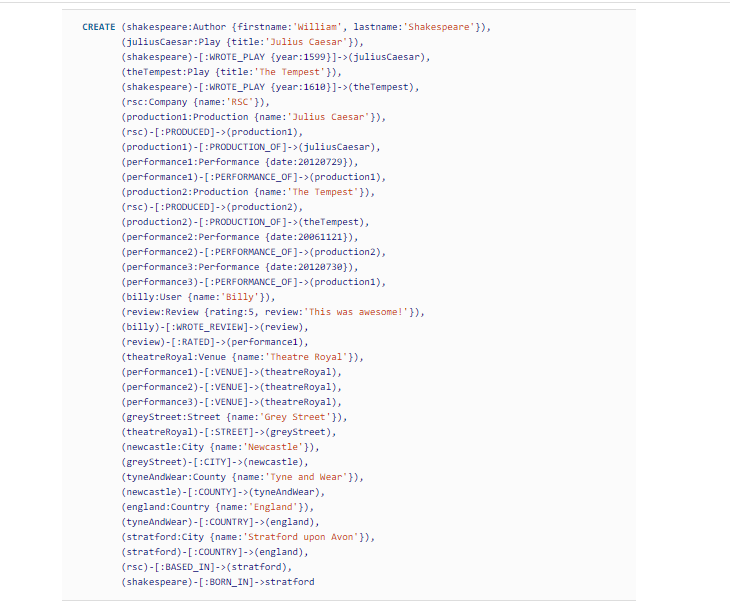

* The preceding Cypher code does two different things
1. creates labeled nodes(and their properties)
2. It creates relationships between the nodes (with properties where necessary)


* Important to note: Identifiers remain available for the duration of the current query scope, but no longer. Should we wish to give long-lived names to nodes , we simply create an index for a particular label and a key property combination.
* Business data is completely abstracted in the properties
* we don't have to worry about FK or cardinality constraints polluting real data, because both are explicit in the graph model in the form of nodes and the semantically rich relationships that interconnect them. 



### Beginning a Query

* always begin our queries from on or more well known starting points in the graph - these are called bound nodes
* Cypher uses any labels and property predicates supplied in the MATCH and WHERE clauses, together with metadata supplied by indexes and constraints, to find the starting points that anchor our graph patterns.
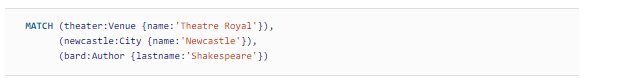

* In the above example there is data that is bound to indentifiers (in the above examble 'Theatre Royale', 'newcastle, 'shakespeare' are all identifiers
* pattern will be anchored to the real nodes associated with those three identifiers


### Indexes and Constraints

#### Indexes
* Indexes help optimize the process of finding specific nodes
* Most of the time, when querying a graph, we're happt to let the traversal process discover the nodes and relationsips that meet our information goals. 
* Certain situations that require us to pick out specific nodes directly
* An example of this is when bound nodes require specification. Identifying a starting node requires us to find one or more specific nodes based on some combination of labels and property values. 
* To support efficient node lookup, Cypher allows us to create indexes per label and property combinations. For unique property values we can also specify constraints on their uniqueness. 
* We might choose to index all nodes labeled Venue based on their name property value. 



### Complex Queries 

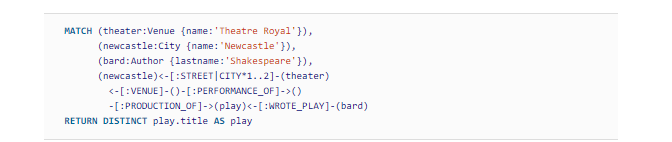

* the identifiers 'newcastle', 'theatre' & 'bard' are anchored to real nodes in the graph based on the specific label and property values. 
* If there are several Theatre Royals in our database (the british cities of Plymouth, Bath and Norwich have Theatre Royals), then theatre will be bound to all of these nodes. to restrict our pattern to the Theatre Royal in NewCastle, we use the syntax <-[:STREET|CITY*1..2] which means the theatre node can be no more than two outgoing STREET and or CITY relationships away from the node representing the city of Newcastle. By providing a variable depth path, we allow for relatively fine grained address hierarchies. 
* The syntax (theatre) <- [:VENUE] - () uses an anonymous node, Hence the empty parenthesis. Knowing the data as we do, we expect the anonymous node to mathc performances, but we're not interested in using the details of individual performance elsewhere in the query or in the results, we don't name the node or bound it to an identifier. 


### Constraining Matches

* we constrain graph matches using the WHERE clause. WHERE allows us eliminate matched subgraphs from the results by stipulating or or more of the following: 
- That certain paths must be present or absent from the matches subgraphs
- That nodes must have certain labels or relationships in the matched subgraphs
- That specific properties on matched nodes and relationships must be present (or absent), irrespective of their values. 
- That certain properties on matched nodes and relationships must have specific values
- That other predicates must be satisfied 
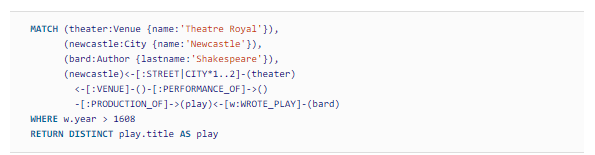


### Processing Results

* Cypher's RETURN clause allows us to perform some processing on the matched graph data before returning it to the user (or the application) that executed the query. 
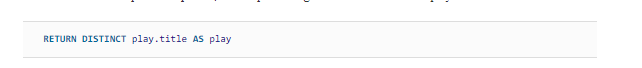

* Distinct ensures that we return unique results. Because each play can be performed multiple times in the same theatre. 
* We can further enrich these results in several ways - including aggregating, ordering, filtering and limiting the returned data. 
* Aggregations functions exist ! like COUNT
* ORDER BY also exists 



### Query Chaining (WITH clause)

* WITH Clause. Sometimes it is not practical or possible to do everything you want in a single MATCH.
* WITH clause allows us to chain together several matches, with results of the previous query part being piped into next. In the following example we find the plays written by shakespeare and order them based on the year in which they were writen.
* WITH helps conquer and divide queries by breaking a complex query into several smaller parts. 

## Common Modeling pitfalls


### pitfall 1: Missing information 

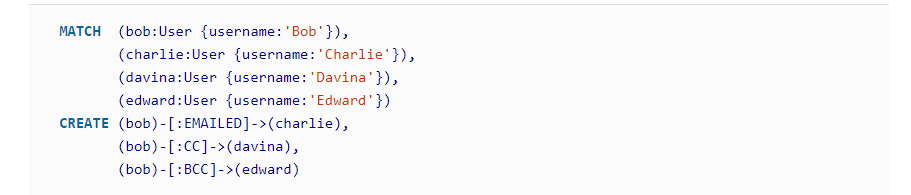
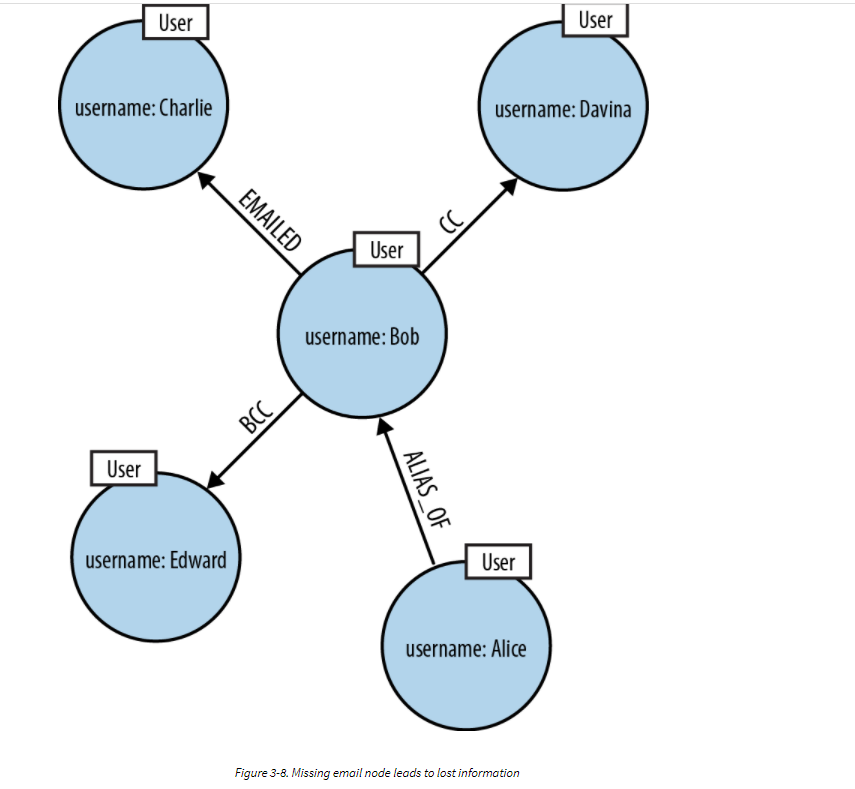

* The above example shows how missing an email node can be a real problem. 
* In English, it's easy and concenient to shorten the phrase "Bob sent an email to Charlie" 

### second time's the charm 

* to fix our lousy model, we need to insert email nodes to it.






## Evolving domain

* As with any database our graph serves as a system that will evolve.
* In a graph to add new facts or compositions, we tend to add new nodes and relationships rather than change the model in place. Adding to the graph using new kinds of relationships will not affect any existing queries and is completely safe. 
* changing the graph using existing relationship types and changing properties (not just values) MIGHT be safe.
* Will often need to check via querying. 

## Identifying Nodes and Relationships
* Modeling process can best be summed up as an attempt to create a graph structure that expresses the questions we want to ask our domain.

1. Describe the client or end user goal that motivates the model
2. Rewrite these goals as questions to ask the domain
3. Identify the entities and relationship that appear in these questions.
4. Translate these entities and relationships into Cypher path expressions
5. Express the questions we want to ask of our domain as graph patterns using path expressions similar to the ones we used to model the domain. 

#### Common nouns  become labels "user", "email"
#### verbs that take an object become relationship names: "sent" , "wrote
#### Proper nouns become instances of nodes, which we map instance properties to node properties. 


## Avoiding Anti patterns

* in general don't encode relationshios. Use relationsh ot convey semantics about how entities are related,and the quality of those relationships
* Domain entities aren't always immediately available in speech so we need to think carefully about the nouns we are working with. 
* Verbing (transforming a noun into a verb) can also be problematic. 
* Graph databases maintain fast query times even when storing vast amounts of data. Learning to trust our graph database is important when learning to structure our graphs without denormalizing them. 




# Chapter 4 - Building a graph database application

### Nodes for things, Relationship for structure

* though not applicable in every situation, these general guideleines will help us choose when to use nodes, and when to use realtionships. 



* Use nodes to represent entities - that is, the things in our domain that are of interest to us, and which can be labeled and grouped
* Use relationships to express the connections between entities and establish semantic context for each entity, therby structuring the domain.
* Use relationship direction to further clarify relationship semantics. Many relationships are asymetrical which is why relationships in a property graph are always directed. 
* Use node properties to represent entity attributes, plus any neccessary entity metadata, such as timestamps, version numbers, etc. 
* Use relationship properties to express the strength, weight, or quality of a relationship, plus any neccessary relationship metadata, such as timestamps, version numbers,etc.

* pays to be dilligent and identify domains.
* again be cognizant to not define entities as relationships (verbize words - look google'd .... using that in a verb context is a mistake). 



### Fine-Grained versus Generic Relationships

* When designing relationships we should be mindful of the trade-offs between fine grained relationship names versus generic relationships qualified with properties. It's the difference between using [:DELIVERY_ADDRESS] and [:HOME_ADDRESS] versus [:DELIVERY_ADDRESS{type: address}

* using one or more property values to decide whether or not to follow a relationship incurs extra I/O the first time those properties are accessed because the properties reside in a seperate store file from the relationships (after that, however, they're cached.

* Use fine grained relationships (or distinct relationship labels) whenever we have a closed set of relationship names. Weightings - as required by a shortest-path algorithim-rarely comprise a closed set, and are usually best represented as properties on a relationship. 

* Sometimes, however, we have a closed set of relationships, but in some traversals we want to follow specific kinds of relationships within that set, whereas in others we want to follow all of them, irrespective of type. Addresses are a good example. Following the closed-set principle, we might choose to create HOME_ADDRESS, WORK_ADDRESS, and DELIVERY_ADDRESS relationships. This allows us to follow specific kinds of address relationships (DELIVERY_ADDRESS, for example) while ignoring all the rest. But what do we do if we want to find all addresses for a user? There are a couple of options here. First, we can encode knowledge of all the different relationship types in our queries: e.g., MATCH (user)-[:HOME_ADDRESS|WORK_ADDRESS|DELIVERY_ADDRESS]->(address). This, however, quickly becomes unwieldy when there are lots of different kinds of relationships. Alternatively, we can add a more generic ADDRESS relationship to our model, in addition to the fine-grained relationships. Every node representing an address is then connected to a user using two relationships: a fined-grained relationship (e.g., DELIVERY_ADDRESS) and the more generic ADDRESS {type:'delivery'} relationship.




### Model Facts as Nodes

* When two or more domain entities interact for a period of time, a fact emerges. 
* We represent a fact as a seperate node with connections to each of the entities engaged in the fact. Modeling an action in terms of its product - that is in terms of the thing that results form the action 

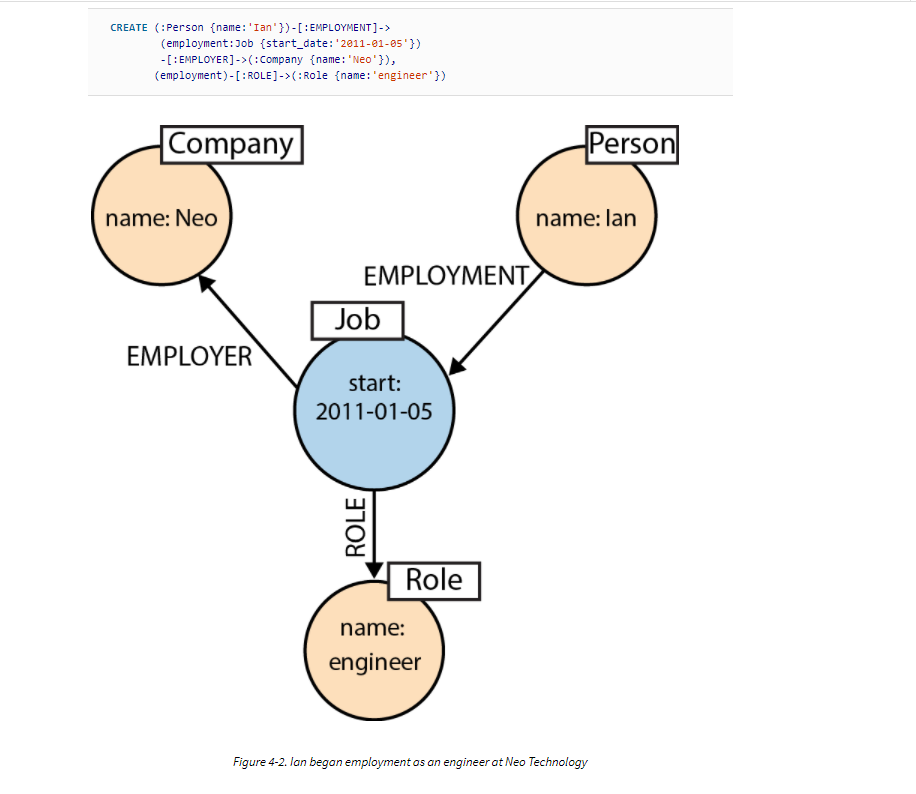
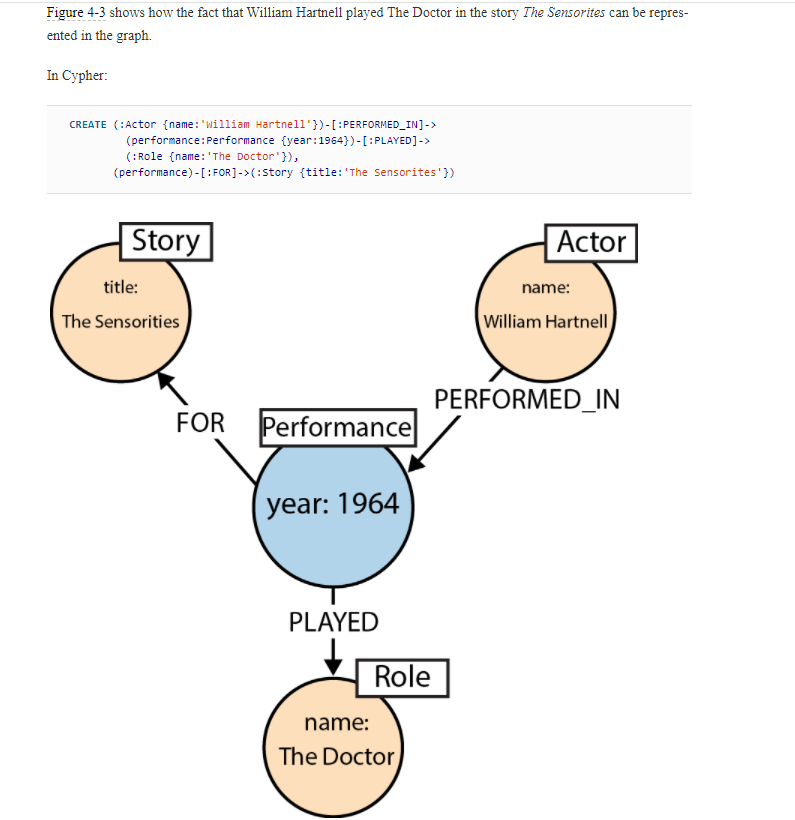



### Represent Complex Value Types as Nodes

* Value types are things that don't have an identity, and whose equivalnce is based on their value. 
* Money, adresses, SKUS, etc. 



### TIME

* You can represent time in two different ways: linkedlist, timeline trees

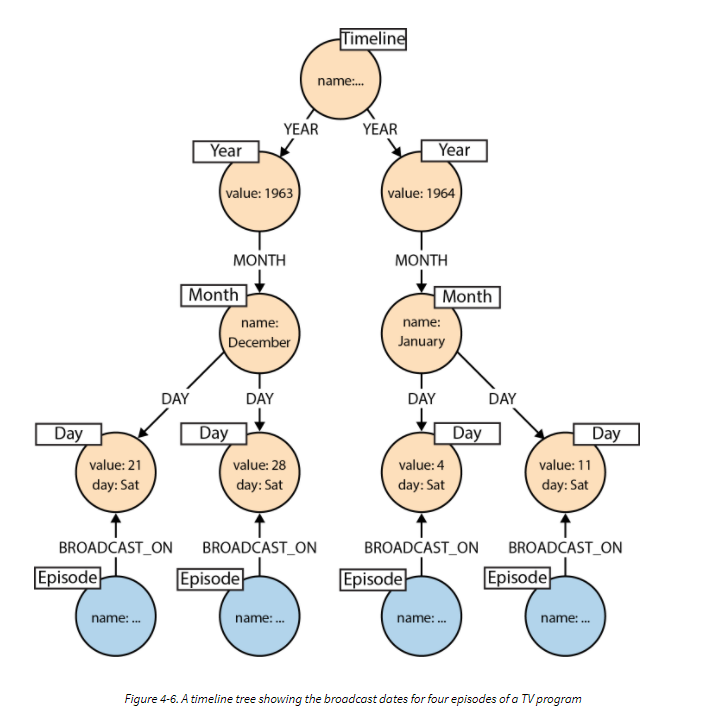
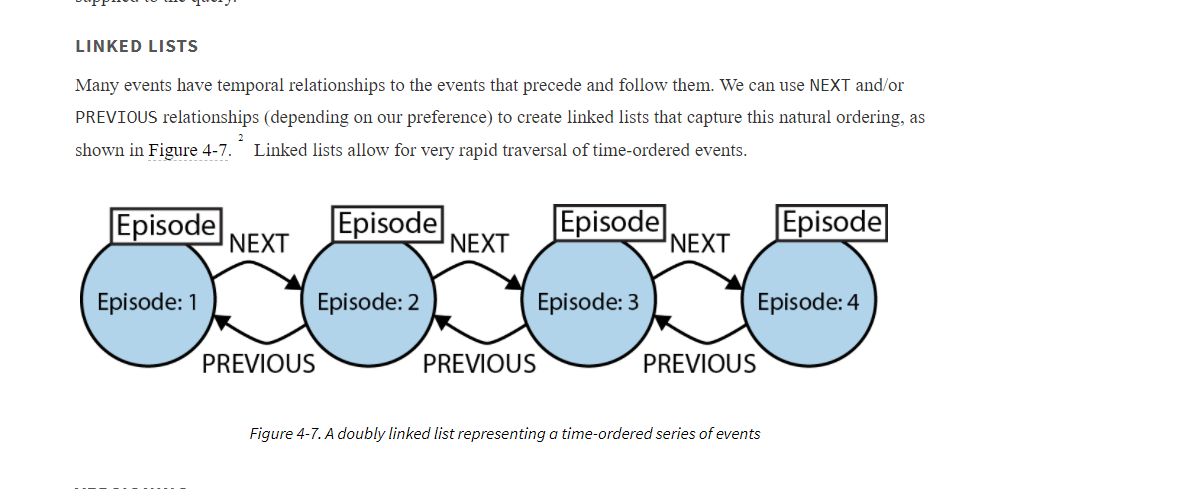



# Application Architecture

* In planning a graph database-based solution, there are several architectural decisions to be made. These decisions will vary slightly depending ont he database product we've chosen.


## Embedded versus Server

* Most databases today run as a server that is accessed through a client library. Neo4j is a little unusual because it can be run both embedded and in server mode - In fact, going back nearly 10 years, it's origins are as an embedded database.
* NOTE: An embedded database is not the same as an in-memory databases. A embedded instance of Neo4j still makes data durable on disk (writes to disk). 


## Embedded mode Neo4j

* in embedded mode, Neo4j runs in the same process as our application. Embedded Neo4j is ideal for hardware devices, desktop applications and for incorporating in our own application servers. 

#### Advantages of embedded mode:
* Low Latency - No network overhead
* Choice of API(s) - We have access to the full range of APIs for creating and querying data: the Core API, Traversal Framework, and the Cypher language. 
* Explicit transactions - Using the Core API, we can control the transaction life cycle, executing arbitrarily complex sequences of commands against the database in a single transaction. The Java API also expose the transaction life cycle, enabling us to plug in custom transaction event handlers that execute additional logic with each transaction. 


## Gotchas of Embedded mode


#### jvm based database
* Neo4j is a JVM-based database. Many of it's APIs are, therefore, accessible only from a JVM-based language. 


#### garbage collection in host application can impact performance
* When running in embedded mode, Neo4j is subject to the garbage collection behaviors of the host application. Long GC pauses can affect query time. Further running an embedded instance as part of a High availability cluster, long GC pauses can cause the cluster protocol to trigger a master relection. 


#### database lifecycle
* application is responsible for the database lifecycle - including starting and closing it safely. 


#### clustering
* neo4j in embedded mode can still be clustered for HA and horizontal read scaling just as the server version. You can actually combine embedded and server instances in a mixed cluster config



## Server mode Neo4j

* Most common means of deploying database today. At the heart of each server is an embedded instance of Neo4j. Some of the benefits of server mode:

#### Rest API
* The server exposes a rich REST API that allows clients to send JSON formmated requested over HTTP. 

#### Platform independence
* Because access is by way of JSON formatted documents sent over HTTP, a neo4j server can be accessed by a client running practically any platform. All that is needed is an HTTP cient library. 

#### Scaling independence
* Because it is decoupled from the application - you can scale both horizontally per needs

### Isolation from Garbage collection behavior of applicaiton
* Much less impacted by GC
* Server extensions may still impact 


## Gotchas of Server mode

#### Network overhead
* There will be some overhead for the http requests. TCP connection remains open after first request. 

### Transaction state
* Neo4j has a transactional Cypher endpoint. This allows the client to executee a series of Cypher statements in the context of a single transaction 






# Server extensions

* Server extensions enable us to run Java code inside the server. Using server extensions, we can extend the REST API or replace it entirely. 
* Extensions take the form of JAX-RS

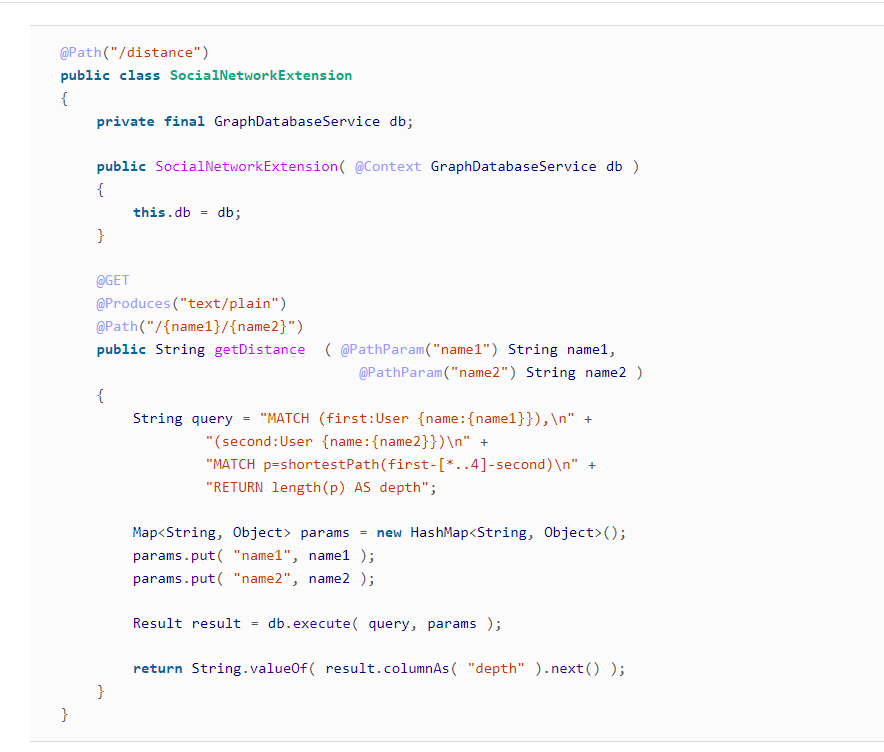

## Primary uses

#### Complex transactions:
* Extensions enable us to execute an arbitrarily complex sequence of operations in the context of a single transaction

#### Choice of APIs 
* Each extension is injected with a reference to the embedded graph database at the heart of the server. This gives us access to the full range of API(s) - Core, Traversal, graph algo package and Cypher - for developing the extensions behavior

#### Encapsulation
* Because each extension is hidden behind a rest interface, we can improve and modify it's implementation over time. 


### Response format

* We control the response - both the representation format and the HTTP headers. This enables us to create response messages whose contents employ terminology  of the Standard REST API (users, orders, products) instead of nodes, relationships. Further in controlling HTTP headers attached to the response we can leverage the HTTP protocol for things such as caching and conditional requests. 


## Considerations (drawbacks)

### JVM only

* Same with developing against embedded Neo4j, we'll have to use a JVM-based language. 


### GC Behaviors
* We can do arbitraialy complex (and dangerous) things inside a server extension. We need to monitor GC behavior.




# Clustering

* Neo4j clusters for high availability and horizontal read scaling using master-slave replication. 


### Replication

* Although all writes to a cluster are coordinated through the mate master, Neo4j does not allow for writing to a slave. 
* Only reason to write to slaves is to ensure durability guarentees of each write. 


#### Global Clusters and queues

* in high write-scenarios we can use queues to buffer writes and regulate load. With this strategy, writes to the cluster are buffered in a queue. 
* It is possible to install a multiregion cluster in multiple data cetners on cloud platforms such as Amazon Web Services. A multiregion cluster in multiple data centers and on cloud platforms such as Amazon Web Services (AWS). 



### Load balancing and Cache sharing

* When using a clustered graph database, we should consider load balancing traffic across the cluster to help maximize throughput and reduce latency. 
* You can sepearete read traffic from write traffic (requests) . This is possible because best practice is to have the master delegate all write requests. 
* Partitioning in graph technologies if very difficult. Solution is a technique called cache sharing which consists of routing each request to a database instance in a HA cluster whre the portion of the graph neccessary to satisfy the request is likely already in main memory. 
* Review this!!!! skipping for now.


### Performance optimization options

* Increase JVM heap size
* Increase the percentage of the store mapped in the page caches
* Invest in faster disks: SSD 






